In [1]:
import numpy as np
from numpy import exp, loadtxt, pi, sqrt
from scipy import stats
from scipy.stats import binned_statistic 
from astropy.table import Table, Column, MaskedColumn
import math
import matplotlib.pyplot as plt
import pylab
from astropy.io import ascii
import pickle
import pandas as pd
import os.path
from numpy import exp, loadtxt, pi, sqrt

/tmp/ipykernel_552/414660974.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def am(val):
    return (val[1:]+val[:-1])/2

from scipy import interpolate
def confidence_intervals(z,dx=1,dy=1):
    """
    takes normalised probability distribution as input (fi dx,dy=1 then probdist=n/Ntotal)
    outputs the level of the contour at which 75% 50% and 25%
    """
    n = 20
    t = np.linspace(0, z.max(), n)
    integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2)) *dx*dy
    f = interpolate.interp1d(integral, t)
    t_contours = f(np.array([0.95,0.68,0.40]))
    return np.append(t_contours,1)

In [3]:
#Obtengo la max y min mass de TNG LH (bar) 
nsim = 27
lista_columns = ['id','pid','Mvir','Rvir','Rs_Klypin','ba','ca','ba500c','ca500c'] 


path = '../Data/Rockstar/IllustrisTNG/CV/CV_'
for i in range(nsim):
    if i == 0:
        data_bar = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,37,46,47,51,52), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=63, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,37,46,47,51,52), low_memory=False)
        data_bar = pd.concat([data_bar, data_aux])
  

cv = data_bar.Rvir / data_bar.Rs_Klypin
data_bar.insert(9,'cv', cv)
data_bar

,id,pid,Mvir,Rvir,Rs_Klypin,ba,ca,ba500c,ca500c,cv
0,344582,-1,5.185000e+13,761.179,108.21300,0.70149,0.44993,0.66518,0.43560,7.034081
1,344705,-1,2.447000e+13,592.586,117.58700,0.85064,0.63682,0.73052,0.55627,5.039554
2,348606,-1,2.410000e+13,589.585,117.70500,0.56102,0.39976,0.49704,0.40053,5.009006
3,348588,-1,1.993000e+13,553.399,69.91930,0.60733,0.51191,0.58078,0.47700,7.914825
4,343262,-1,1.959000e+13,550.248,37.00850,0.71073,0.66767,0.71648,0.66056,14.868152
...,...,...,...,...,...,...,...,...,...,...
6857,359728,-1,1.946000e+08,11.830,0.64873,0.00000,0.00000,0.00000,0.00000,18.235630
6858,359426,-1,1.427000e+08,10.666,0.69526,0.00000,0.00000,0.00000,0.00000,15.341024
6859,355962,-1,1.298000e+08,10.334,0.74380,0.00000,0.00000,0.00000,0.00000,13.893520
6860,356573,-1,1.298000e+08,10.334,3.38284,0.00000,0.00000,0.00000,0.00000,3.054830


In [4]:
#Obtengo la max y min mass de TNG LH (bar) 

path = '../Data/Rockstar/IllustrisTNG_DM/CV/CV_'
for i in range(nsim):
    if i == 0:
        data_dm = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,37,46,47,51,52), low_memory=False)
    if i > 0: 
        data_aux = pd.read_table(path + str(i) + '/hlists/hlist_1.00000.list', index_col=False, header=64, sep='\s+', names=lista_columns, 
                         usecols=(1,5,10,11,37,46,47,51,52), low_memory=False)
        data_dm = pd.concat([data_dm, data_aux])
  

cv = data_dm.Rvir / data_dm.Rs_Klypin
data_dm.insert(9,'cv', cv)
data_dm

,id,pid,Mvir,Rvir,Rs_Klypin,ba,ca,ba500c,ca500c,cv
0,305741,-1,5.031000e+13,753.539,84.70250,0.69481,0.42100,0.63980,0.40566,8.896302
1,306461,-1,2.601000e+13,604.806,89.63340,0.60011,0.49157,0.53776,0.47619,6.747552
2,309555,-1,2.529000e+13,599.171,109.45500,0.67742,0.45648,0.55888,0.51457,5.474131
3,309717,-1,2.224000e+13,574.011,55.56900,0.55763,0.47808,0.52083,0.43896,10.329698
4,303801,-1,2.156000e+13,568.145,50.95240,0.52638,0.50137,0.49578,0.47999,11.150505
...,...,...,...,...,...,...,...,...,...,...
7383,317445,-1,8.530000e+08,19.359,0.92893,0.70426,0.31840,0.92305,0.05390,20.840106
7384,317381,317510,6.204000e+08,17.409,1.46860,0.03328,0.00016,0.88646,0.06240,11.854147
7385,319255,-1,6.204000e+08,17.409,1.21875,0.66933,0.08259,0.47274,0.06581,14.284308
7386,315300,315454,5.428000e+08,16.651,4.37046,0.85686,0.00205,0.00000,0.00000,3.809896


In [5]:
halos_bar = data_bar[(data_bar.pid == -1) & (data_bar.Mvir > 2e11)  & (data_bar.Mvir < 1e12)]

print(len(halos_bar))
min_mass_hbar        = halos_bar.Mvir.min()
max_mass_hbar        = halos_bar.Mvir.max()

5378


In [6]:
halos_dm = data_dm[(data_dm.pid == -1) & (data_dm.Mvir > 2e11) & (data_dm.Mvir < 1e12)]

print(len(halos_dm))
min_mass_hDM = halos_dm.Mvir.min()
max_mass_hDM = halos_dm.Mvir.max()

5801


In [7]:
valy1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=30, density = False)
edgex = am(edge1)
edgey = am(edge2)

Text(0, 0.5, '$b/a$')

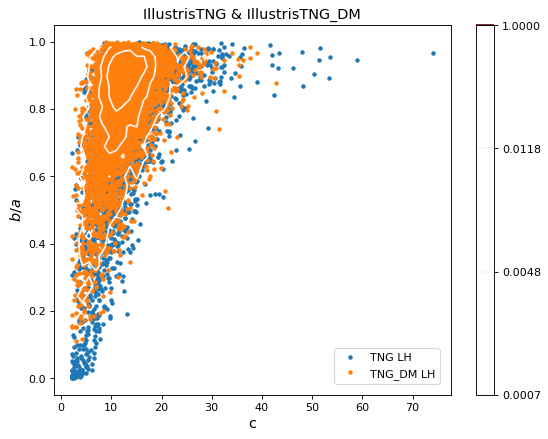

In [136]:
pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(halos_bar.cv, halos_bar.ba,'.',label = "TNG LH")
plt.plot(halos_dm.cv, halos_dm.ba,'.',label = "TNG_DM LH")

#plt.contour(edgex, edgey, valy1.T / np.sum(valy1), levels = 5, cmap = 'Purples')
#plt.colorbar()

lvl = confidence_intervals(valy1.T/valy1.sum())
plt.contour(edgex, edgey,valy1.T/valy1.sum(),levels=lvl,cmap='Reds')
plt.colorbar()

plt.title('IllustrisTNG & IllustrisTNG_DM', fontsize = 13)
plt.legend(loc = 0, borderaxespad = 1.)
plt.xlabel('c', fontsize=13)
plt.ylabel(r'$b/a$', fontsize=13)
#plt.xscale('log')
#plt.yscale('log')
#fig.savefig('fig1.png')

Text(0, 0.5, '$R_{vir}$')

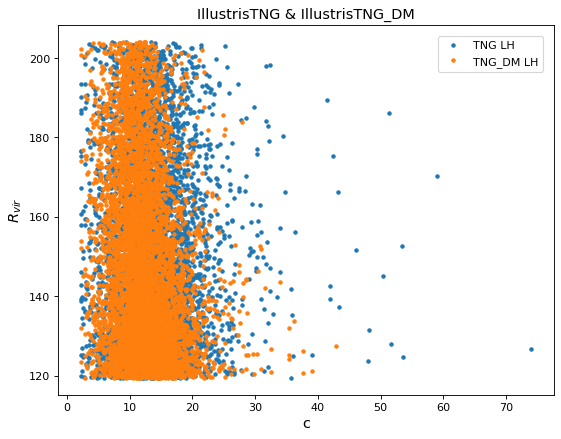

In [150]:
pylab.figure(num = None, figsize = (8, 6), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(halos_bar.cv, halos_bar.Rvir,'.',label = "TNG LH")
plt.plot(halos_dm.cv, halos_dm.Rvir,'.',label = "TNG_DM LH")

#plt.contour(edgex, edgey, valy1.T / np.sum(valy1), levels = 5, cmap = 'Purples')
#plt.colorbar()


plt.title('IllustrisTNG & IllustrisTNG_DM', fontsize = 13)
plt.legend(loc = 0, borderaxespad = 1.)
plt.xlabel('c', fontsize=13)
plt.ylabel(r'$R_{vir}$', fontsize=13)

In [12]:
bins = 15
##spin vs conc
ca_range   = [0.25, 1.05]
conc_range = [0.1, 30]
ba_range   = [0.45, 1.05]
spin_range = [0, 0.1]
rvir_range = [120, 200]
density    = False

In [13]:
valy1,edge1,edge2 = np.histogram2d(halos_bar.Rvir, halos_bar.cv, bins=bins, range = [ rvir_range,conc_range],density=density)
valx1,edge1,edge2 = np.histogram2d(halos_dm.Rvir, halos_dm.cv, bins=bins, range = [ rvir_range,conc_range],density=density)
valp1,edge1,edge2 = np.histogram2d(halos_bar.Rvir, halos_bar.cv, bins=bins, range = [ rvir_range,conc_range],density=density)
edgex = am(edge1)
edgey = am(edge2)
#%print (edgey)

## vs c/a
_2valy1,edge1,edge2 = np.histogram2d(halos_bar.Rvir, halos_bar.ca, bins=bins, range = [ rvir_range,ca_range],density=density)
_2valx1,edge1,edge2 = np.histogram2d(halos_dm.Rvir, halos_dm.ca, bins=bins, range = [ rvir_range,ca_range],density=density)
_2valp1,edge1,edge2 = np.histogram2d(halos_bar.Rvir, halos_bar.ca, bins=bins, range = [ rvir_range,ca_range],density=density)
_2edgex = am(edge1)
_2edgey = am(edge2)
#%


_3valy1,edge1,edge2 = np.histogram2d(halos_bar.Rvir, halos_bar.ba, bins=bins, range = [ rvir_range,ba_range],density=density)
_3valx1,edge1,edge2 = np.histogram2d(halos_dm.Rvir, halos_dm.ba, bins=bins, range = [ rvir_range,ba_range],density=density)
_3valp1,edge1,edge2 = np.histogram2d(halos_bar.Rvir, halos_bar.ba, bins=bins, range = [ rvir_range,ba_range],density=density)
_3edgex = am(edge1)
_3edgey = am(edge2)

## halo concentration vs c/a
_4valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ca, bins=bins, range = [ conc_range,ca_range],density=density)
_4valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ca, bins=bins, range = [ conc_range,ca_range],density=density)
_4valp1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ca, bins=bins, range = [ conc_range,ca_range],density=density)
_4edgex = am(edge1)
_4edgey = am(edge2)

## halo concentration vs b/a
_5valy1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ba, bins=bins, range = [ conc_range,ba_range],density=density)
_5valx1,edge1,edge2 = np.histogram2d(halos_dm.cv, halos_dm.ba, bins=bins, range = [ conc_range,ba_range],density=density)
_5valp1,edge1,edge2 = np.histogram2d(halos_bar.cv, halos_bar.ba, bins=bins, range = [ conc_range,ba_range],density=density)
_5edgex = am(edge1)
_5edgey = am(edge2)

## ca vs b/a
_6valy1,edge1,edge2 = np.histogram2d(halos_bar.ca, halos_bar.ba, bins=bins, range = [ ca_range,ba_range],density=density)
_6valx1,edge1,edge2 = np.histogram2d(halos_dm.ca, halos_dm.ba, bins=bins, range = [ ca_range,ba_range],density=density)
_6valp1,edge1,edge2 = np.histogram2d(halos_bar.ca, halos_bar.ba, bins=bins, range = [ ca_range,ba_range],density=density)

_6edgex = am(edge1)
_6edgey = am(edge2)

In [16]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Purples')
colorp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(1.0)]
colorpp = [cmap(0.3), cmap(0.4),cmap(0.5),cmap(0.9)]
cmap = matplotlib.cm.get_cmap('binary')
colorb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
#colorbb = [ cmap(0.6),cmap(0.6),cmap(0.6),cmap(0.6)]
cmap = matplotlib.cm.get_cmap('Oranges')
coloro = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.8)]
coloroo = [cmap(0.3), cmap(0.5),cmap(0.7),cmap(0.89)]

#colorp = colorp[1:]
#colorb = colorb[1:]
#coloro = coloro[1:]

def easyplot(valx,valy,valp,edgex,edgey,lrview=True,predview=False):
    alpha=0.26
    if lrview ==True:
        lvl = confidence_intervals(valx.T/valx.sum())
        ax.contourf(edgex,edgey,valx.T/valx.sum(),colors=colorp,levels=lvl,alpha=alpha)
        c1 = ax.contour(edgex,edgey,valx.T/valx.sum(),levels=lvl,colors=colorpp,linewidths=3)
        h1,l1 = c1.legend_elements()
    else:
        h1=None
    lvl = confidence_intervals(valy.T/valy.sum())
    ax.contourf(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloroo,alpha=alpha)
    c2 = ax.contour(edgex,edgey,valy.T/valy.sum(),levels=lvl,colors=coloro,linewidths=3)
    h2,l1 = c2.legend_elements()
    if predview == True:
        lvl = confidence_intervals(valp.T/valp.sum())
        CS = ax.contour(edgex,edgey,valp.T/valp.sum(),levels=lvl,colors=colorb,linewidths=4,linestyles='dashed')
        h3,l3 = CS.legend_elements()
        for c in CS.collections:
            c.set_dashes([(1,(3.0,3.0))])
    else:
        h3=None
    return h1,h2,h3

/tmp/ipykernel_552/216539413.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Purples')
/tmp/ipykernel_552/216539413.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('binary')
/tmp/ipykernel_552/216539413.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('Oranges')


True

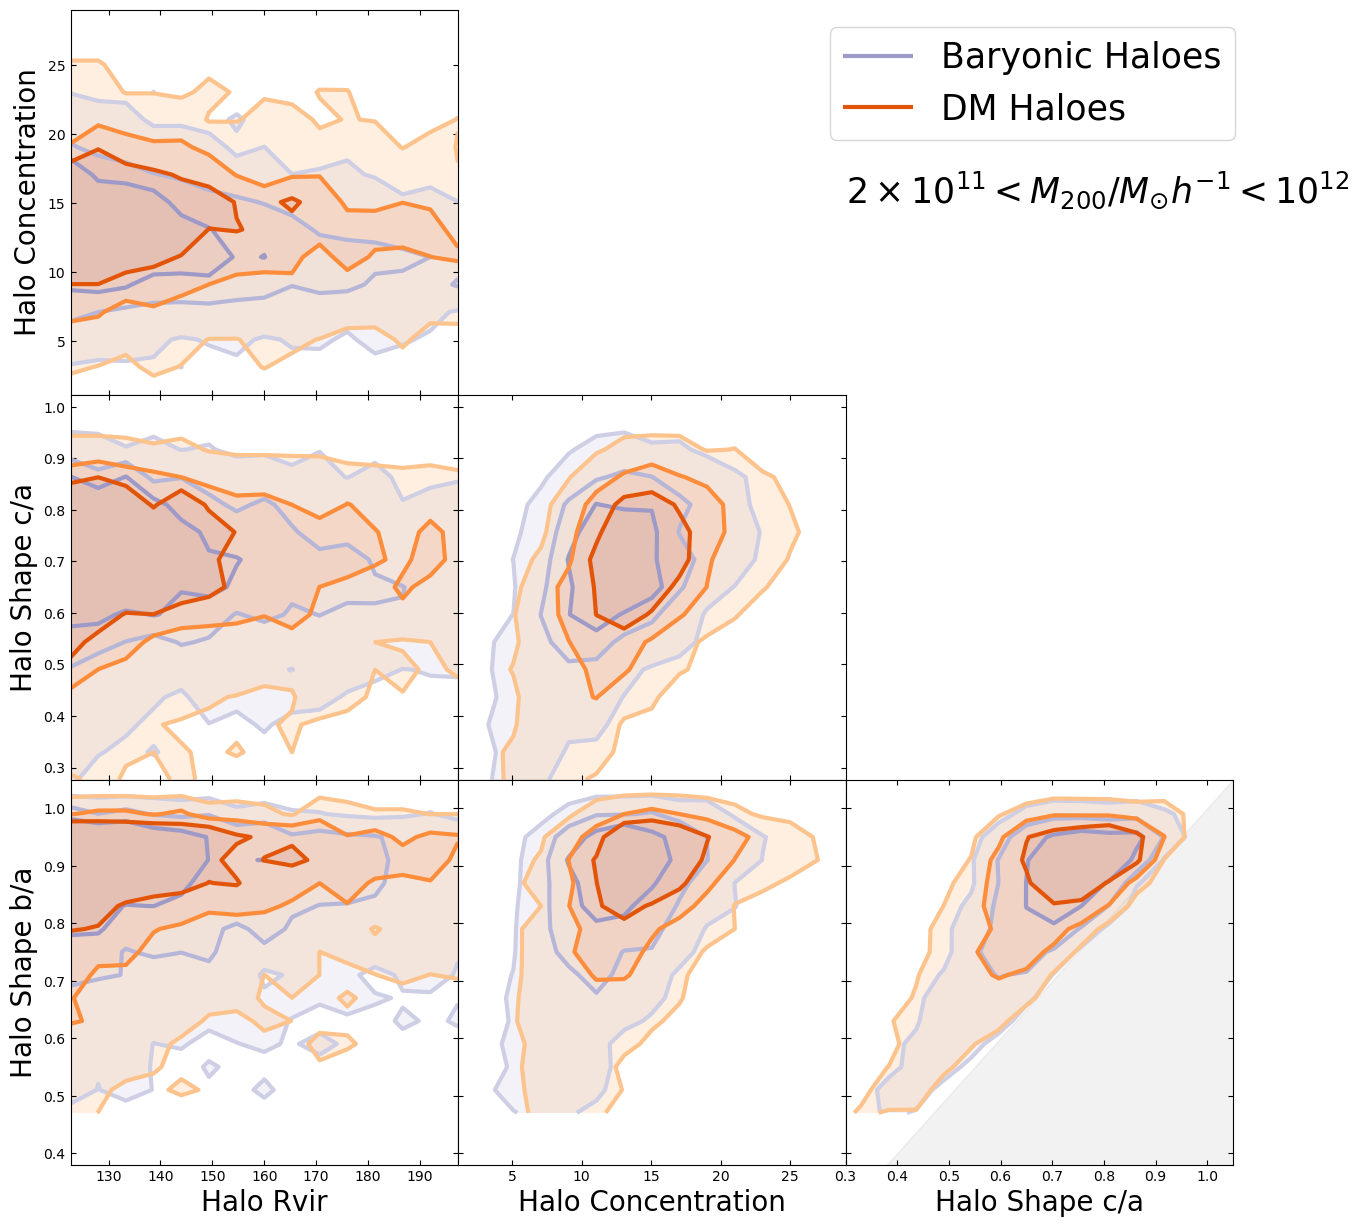

In [24]:
import time
t = time.time()

from matplotlib import pyplot as plt
from matplotlib import ticker, cm
#%from matplotlib import rc

#%rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#%rc('text', usetex=True)

lvl = [0.0014,0.0028,0.0035,1]
lvl = 3
lvl = [0.0014,0.0028,0.01]
#alpha=0.25

vmax = 0.008
vmaxcont = 0.005

fig,axs  = plt.subplots(3,3,figsize=(15,15),gridspec_kw={ 'wspace':0,'hspace': 0},sharex='col',sharey='row')
#ax = axs[0,0]
axs[0, 2].axis('off')
axs[0, 1].axis('off')
axs[1, 2].set_visible(False)

ax = axs[0,0]
h1,h2,h3 = easyplot(valx1,valy1,valp1,edgex,edgey)
axs[0,0].yaxis.set_ticks_position('both')
axs[0,0].tick_params(axis='x', direction='in')
axs[0,0].tick_params(axis='y', direction='in')
axs[0,0].xaxis.set_ticks_position('both')
axs[0,0].set_ylabel('Halo Concentration',fontsize=20)

if h3 is not None:
    axs[0,0].legend([h1[-2], h2[-2],h3[-2]], ['Baryonic Haloes', 'DM Haloes','Our-Prediction (for DM haloes)'],fontsize=25,bbox_to_anchor=(3.05, 1))
else:
    axs[0,0].legend([h1[-2], h2[-2]], ['Baryonic Haloes', 'DM Haloes'],fontsize=25,bbox_to_anchor=(3.05, 1))
    axs[0,0].text(2,0.5, '$2 \\times 10^{11} < M_{200}/M_{\odot}h^{-1} < 10^{12}$', transform = axs[0,0].transAxes, fontsize = 25)
    
#axs[1, 0].contourf(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[1, 0].contour(_2edgex,_2edgey,_2valy.T/_2valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[1, 0].contourf(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[1, 0].contour(_2edgex,_2edgey,_2valx.T/_2valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
axs[1,0].set_ylabel('Halo Shape c/a',fontsize=20)
#CS = axs[1, 0].contour(_2edgex,_2edgey,_2valp.T/_2valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3.5,linestyles='dotted')
ax = axs[1,0]
easyplot(_2valx1,_2valy1,_2valp1,_2edgex,_2edgey)
axs[1,0].yaxis.set_ticks_position('both')
axs[1,0].tick_params(axis='x', direction='in')
axs[1,0].tick_params(axis='y', direction='in')
axs[1,0].xaxis.set_ticks_position('both')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
    
    
#axs[2, 0].contourf(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[2, 0].contour(_3edgex,_3edgey,_3valy.T/_3valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[2, 0].contourf(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[2, 0].contour(_3edgex,_3edgey,_3valx.T/_3valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
ax = axs[2,0]
easyplot(_3valx1,_3valy1,_3valp1,_3edgex,_3edgey)
axs[2,0].set_ylabel('Halo Shape b/a',fontsize=20)
axs[2,0].yaxis.set_ticks_position('both')
axs[2,0].tick_params(axis='x', direction='in')
axs[2,0].tick_params(axis='y', direction='in')
axs[2,0].xaxis.set_ticks_position('both')
#CS = axs[2, 0].contour(_3edgex,_3edgey,_3valp.T/_3valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
axs[2,0].set_xlabel('Halo Rvir',fontsize=20)


## halo conc vs c/a
#axs[1, 1].contourf(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[1, 1].contour(_4edgex,_4edgey,_4valy.T/_4valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[1, 1].contourf(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[1, 1].contour(_4edgex,_4edgey,_4valx.T/_4valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
ax = axs[1,1]
easyplot(_4valx1,_4valy1,_4valp1,_4edgex,_4edgey)

axs[1,1].yaxis.set_ticks_position('both')
axs[1,1].tick_params(axis='x', direction='in')
axs[1,1].tick_params(axis='y', direction='in')
axs[1,1].xaxis.set_ticks_position('both')
#CS = axs[1, 1].contour(_4edgex,_4edgey,_4valp.T/_4valp.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])

    
## halo conc vs b/a
#axs[2, 1].contourf(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[2, 1].contour(_5edgex,_5edgey,_5valy.T/_5valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[2, 1].contourf(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[2, 1].contour(_5edgex,_5edgey,_5valx.T/_5valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
axs[2,1].yaxis.set_ticks_position('both')
axs[2,1].tick_params(axis='x', direction='in')
axs[2,1].tick_params(axis='y', direction='in')
axs[2,1].xaxis.set_ticks_position('both')
#CS = axs[2, 1].contour(_5edgex,_5edgey,_5valp.T/_5valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
axs[2, 1].set_xlabel('Halo Concentration',fontsize=20)
ax = axs[2,1]
easyplot(_5valx1,_5valy1,_5valp1,_5edgex,_5edgey)


## halo conc vs b/a
#axs[2, 2].contourf(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Oranges',alpha=alpha)
#axs[2, 2].contour(_6edgex,_6edgey,_6valy.T/_6valy.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Oranges',linewidths=3)
#axs[2, 2].contourf(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmax,levels=lvl,cmap='Purples',alpha=alpha)
#axs[2, 2].contour(_6edgex,_6edgey,_6valx.T/_6valx.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='Purples',linewidths=3)
axs[2,2].yaxis.set_ticks_position('both')
axs[2,2].tick_params(axis='x', direction='in')
axs[2,2].tick_params(axis='y', direction='in')
axs[2,2].xaxis.set_ticks_position('both')
#CS = axs[2, 2].contour(_6edgex,_6edgey,_6valp.T/_6valp.sum(),vmin=0,vmax=vmaxcont,levels=lvl,cmap='binary',linewidths=3,linestyles='dotted')
#for c in CS.collections:
#    c.set_dashes([(11, (3.0, 3.0))])
ax = axs[2,2]
x = np.linspace(0, 1.1, 4)
y = x
plt.fill_between(x, y, where=(x > 0), color='grey', alpha=0.1)
ax.set_xlim([0.3,1.05])
ax.set_ylim([0.38,1.05])

easyplot(_6valx1,_6valy1,_6valp1,_6edgex,_6edgey)


axs[2, 2].set_xlabel('Halo Shape c/a',fontsize=20)
#axs[0, 0].contourf(edgex,edgey,valp.T,vmin=0,vmax=1.5,levels=lvl,cmap='Purples',alpha=0.5)


#plt.subplots_adjust(hspace=.0)
#axs[0,0].grid()
#axs[1,0].grid()
#axs[1,1].grid()
#axs[2,0].grid()
#axs[2,1].grid()
#axs[2,2].grid()
#print (time.time()-t)

plt.savefig('BarVsDM.pdf')